In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [182]:
city_colors = {"Urban": "Black", "Suburban": "Green", "Rural": "Gold"}

In [175]:
rides = pd.read_csv('ride_data.csv')
rides.set_index('city', inplace=True)
rides.sort_index(inplace=True)

cities = pd.read_csv('city_data.csv')
cities['city_color'] = cities['type'].map(lambda x: city_colors.get(x))
cities.set_index('city', inplace=True)
both = pd.merge(rides, cities, how='left', left_index=True, right_index=True)

In [176]:
avg_fair = both.groupby('city').agg(['mean', 'sum'])['fare']['mean']
fair_count = both.groupby('city').count()['type']
out = pd.concat([avg_fair, fair_count], axis=1)
out.head()

,mean,type
city,,
Alvarezhaven,23.928710,31
Alyssaberg,20.609615,26
Anitamouth,37.315556,9
Antoniomouth,23.625000,22
Aprilchester,21.981579,19


(20, 40)

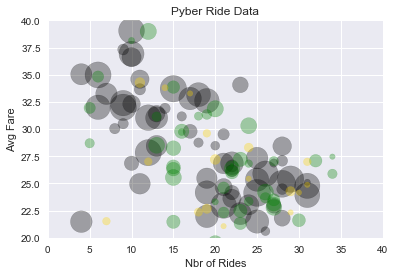

In [177]:
# really they want a point for each ride lol

plt.scatter(fair_count, 
            avg_fair, 
            c = cities.city_color , 
            s = cities.driver_count * 10,
           alpha = .33)
plt.xlabel('Nbr of Rides')
plt.ylabel('Avg Fare')
plt.title('Pyber Ride Data')
plt.xlim(0, 40)
plt.ylim(20, 40)

In [196]:
avg_fair.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: mean, dtype: float64

In [195]:
urban_avg_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Antoniomouth    23.625000
Aprilchester    21.981579
Arnoldview      25.106452
Name: fare, dtype: float64

In [191]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = both[both["type"] == "Urban"]
suburban_cities = both[both["type"] == "Suburban"]
rural_cities = both[both["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]


suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]


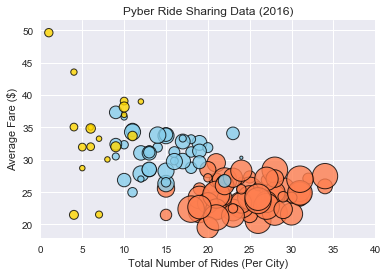

In [197]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0, 40)
plt.grid(True)

In [134]:
# # Mapping Dictionary . - Driver Count per City
# cities.set_index('city').sort_index().driver_count
# cities.set_index('city').sort_index().type

In [135]:
|

SyntaxError: invalid syntax (<ipython-input-135-6f719179e65e>, line 1)

(0, 40)

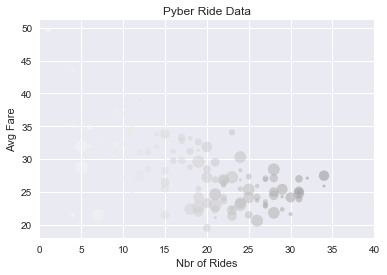